Name: Holly Kular\
Date: 08-14-2024\
Email: hkular@ucsd.edu\
Description: plot results of decoding accuracy over time 

In [1]:
# imports
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import sem, t, ttest_ind, pearsonr
import itertools
import pandas as pd
from scipy.io import loadmat

In [19]:
# load all conds for a single model

RNN_params = {
    'afc': [6, 2],
    'coh': ['hi', 'lo'],
}

# pick a layer
fr = 1
afc = 6
coh = 'hi'
models = [0, 1, 2]
acc = {}

for modelnum in models:

    # load and graph
    #full_file = f'/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    full_file = f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/expected/fr{fr}/{coh}_{afc}afc/boot_all{modelnum}_choice.npz'
    acc = np.load(full_file)
    
    for var in acc:
        # Create a new variable name by combining var with coh and afc
        new_var_name = f"{coh}_{afc}afc_mod{modelnum}"
        globals()[new_var_name] = acc[var]
        

In [9]:
%whos

Variable              Type        Data/Info
-------------------------------------------
RNN_params            dict        n=2
acc                   NpzFile     <numpy.lib.npyio.NpzFile <...>object at 0x7fef60e077f0>
afc                   int         6
alpha                 float       0.05
coh                   str         hi
colors                list        n=6
cond                  ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
confidence            float       0.95
data                  ndarray     71x2: 142 elems, type `float64`, 1136 bytes
dof                   int         999
fr                    int         1
full_file             str         /Volumes/serenceslab/holl<...>6afc/boot_all2_choice.npz
hi_6afc_mod0          ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
hi_6afc_mod1          ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
hi_6afc_mod2          n

In [13]:

i = 0
cond = globals()[f'{coh}_{afc}afc_mod{i}']

In [14]:
cond.shape

(1000, 71, 2)

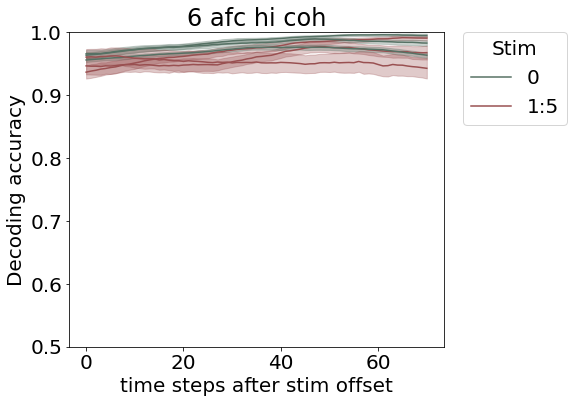

In [20]:
# plot


confidence = .95


colors = ['#567164', '#93A267', '#7BA1BF', '#BE955D', '#995051', '#656193']


plt.figure(figsize = (10,6))
for i in range(len(models)):
    
    cond = globals()[f'{coh}_{afc}afc_mod{i}']
    
    dof = cond.shape[0] - 1
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    data = np.mean(cond, axis = 0)
    x_data = np.arange(data.shape[0])
    
    label_stim0 = '0' if i == 0 else None
    label_stim1 = '1:5' if i == 0 else None
    
    # plot stim 0
    s = cond[:,:,0].std(axis=0)
    plt.plot(data[:, 0], label=label_stim0, color = colors[0])
    plt.fill_between(x_data, data[:,0] -s, data[:,0] +s, color = colors[0], alpha = 0.3)
    
    # plot stim 1
    ss = np.mean(cond[:,:,1:], axis = 2).std(axis=0)
    plt.plot(np.mean(data[:, 1:], axis = 1), label=label_stim1, color = colors[4])
    plt.fill_between(x_data, np.mean(data[:,1:], axis = 1) -ss, np.mean(data[:,1:], axis = 1) + ss, color = colors[4], alpha = 0.3)
    

significant_regions = np.zeros(cond.shape[1], dtype=bool)
alpha = 0.05
for t_step in range(cond.shape[1]):
    stim_0 = cond[:, t_step, 0]
    for i in range(1, 2): # used to be afc
        stim_i = cond[:, t_step, i]
        t_stat, p_value = ttest_ind(stim_0, stim_i)
        if p_value < alpha:
            significant_regions[t_step] = True
            break  # Once we find significance with any stim, we can stop checking

# Shade the regions where Stim 0 significantly differs from others
#plt.fill_between(x_data, plt.ylim()[0], plt.ylim()[1], where=significant_regions, color='red', alpha=0.1)

plt.rcParams.update({'font.size': 20})
plt.xlabel('time steps after stim offset')
plt.ylabel('Decoding accuracy')
plt.title(f'{afc} afc {coh} coh')
plt.legend(title = 'Stim',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0.5, 1)
# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])


#plt.savefig(f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/expected/fr{fr}/{coh}_{afc}afc_allmods_choice.png')
plt.show()



In [29]:
ss.shape

(71, 5)

In [56]:
133/2000


0.0665